# **Mathematical Foundations of Linear Regression**

---

### **Understanding the Linear Regression Model**

Linear Regression predicts a target variable $((y))$ by learning a linear function of the input features $((x_1, x_2, \ldots, x_n))$. It can be expressed as:

$
y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n
$

This is a **parametric model**, meaning it defines a functional form with parameters $((\theta_0, \theta_1, \ldots, \theta_n))$ that need to be learned from the training data.

#### **Vectorized Form**
Using vectors, the model is written as:

$
y = h_\theta(x) = \theta \cdot x
$

Where:
- $(\theta = [\theta_0, \theta_1, \ldots, \theta_n])$: Parameter vector, including the bias term.
- $(x = [x_0, x_1, \ldots, x_n])$: Feature vector, where $(x_0 = 1)$.

The term $(h_\theta(x))$ is the **hypothesis function**.

---

### **Model Training: Finding the Best Parameters**

Training a Linear Regression model involves finding the parameter vector $(\theta)$ that minimizes the difference between the predicted values $((\hat{y}))$ and the actual values $((y))$ in the training set. This difference is quantified using a cost function.

#### **Cost Function: Mean Squared Error (MSE)**
The **Mean Squared Error (MSE)** is a commonly used cost function for regression tasks:

$
MSE(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2
$

Where:
- $(m)$: Number of training instances.
- $(h_\theta(x^{(i)}))$: Predicted value for the $(i)$-th instance.
- $(y^{(i)})$: Actual target value for the $(i)$-th instance.

The goal is to minimize $(MSE(\theta))$, finding the parameter vector $(\theta)$ that results in the best fit for the training data.

---

### **The Normal Equation**
The **Normal Equation** provides a closed-form solution for minimizing the MSE. It directly computes the optimal parameters:

$
\theta = \left( X^T X \right)^{-1} X^T y
$

Where:
- $(X)$: Feature matrix $((m \times n+1)$, including a column of ones for the bias term).
- $(y)$: Target vector $((m \times 1))$.

#### **Example Implementation**

In [1]:
import numpy as np

# Generate synthetic data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

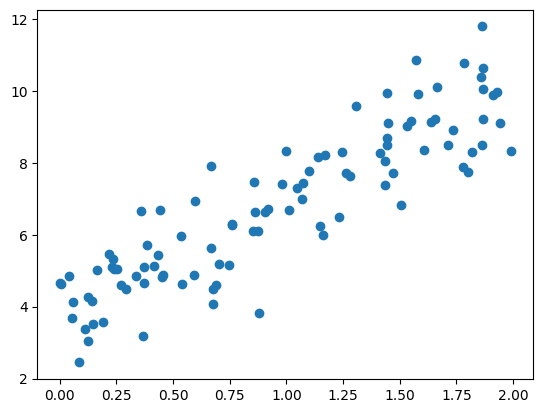

In [2]:
import matplotlib.pyplot as plt 

plt.scatter(X , y)
plt.show()

In [3]:
# Add bias term (x0 = 1) to feature matrix
X_b = np.c_[np.ones((100, 1)), X]

In [4]:
# Compute theta using the Normal Equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
print("Optimal parameters:", theta_best)

Optimal parameters: [[3.80070565]
 [3.12852119]]


#### **Making Predictions**

In [6]:
# New data points
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

In [7]:
# Make predictions
y_pred = X_new_b.dot(theta_best)

In [8]:
print("Predictions:", y_pred)

Predictions: [[ 3.80070565]
 [10.05774803]]


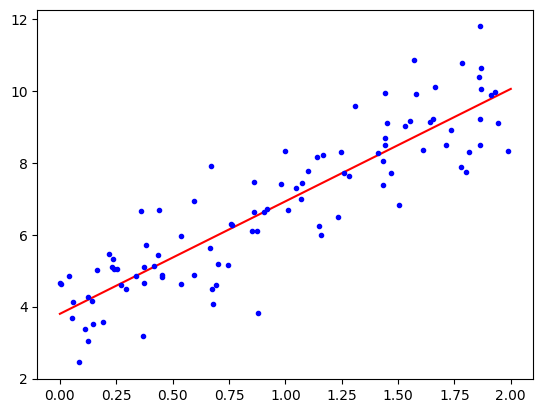

In [9]:
plt.plot(X_new, y_pred, "r-")
plt.plot(X, y, "b.")
plt.show()

---

### **Gradient Descent**

The **Normal Equation** is computationally efficient for datasets with a small number of features. However, for larger datasets or high-dimensional feature spaces, **Gradient Descent** is a more scalable approach.

#### **Key Idea**
Gradient Descent iteratively adjusts the parameter vector $(\theta)$ to minimize the cost function. At each step, the parameters are updated in the direction of the negative gradient of the cost function:

$
\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} MSE(\theta)
$

Where:
- $(\alpha)$: Learning rate (controls the step size).
- $(\frac{\partial}{\partial \theta_j} MSE(\theta))$: Gradient of the cost function with respect to $(\theta_j)$.

#### **Gradient Vector**
The gradient vector is computed as:

$
\nabla_\theta MSE(\theta) = \frac{2}{m} X^T (X\theta - y)
$

---

#### **Gradient Descent Implementation**

In [10]:
# Gradient Descent implementation
learning_rate = 0.01
n_iterations = 1000
m = len(X_b)

In [11]:
# Initialize parameters
theta = np.random.randn(2, 1)

In [12]:
# Compute cost function
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    cost = (1 / m) * np.sum((predictions - y) ** 2)
    return cost

In [13]:
cost_history = []

# Gradient Descent
for iteration in range(n_iterations):
    gradients = (2 / m) * X_b.T.dot(X_b.dot(theta) - y)
    theta -= learning_rate * gradients
    cost = compute_cost(X_b, y, theta)
    cost_history.append(cost)

In [14]:
print("Optimal parameters (Gradient Descent):", theta)

Optimal parameters (Gradient Descent): [[3.78140605]
 [3.14514892]]


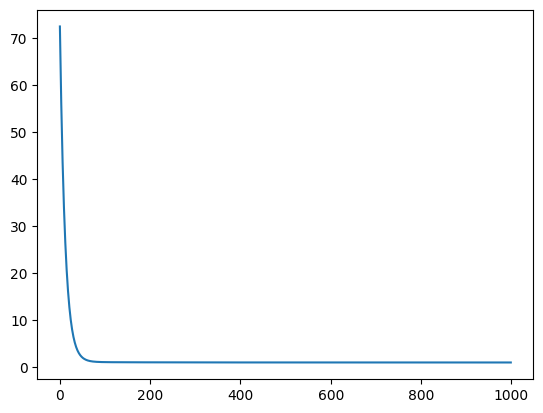

In [15]:
plt.plot(range(n_iterations), cost_history)
plt.show()

---

### **Variants of Gradient Descent**

1. **Batch Gradient Descent**:
   - Uses the entire dataset to compute gradients.
   - Slower for large datasets but guarantees convergence.

2. **Stochastic Gradient Descent (SGD)**:
   - Uses one training instance at a time.
   - Faster but introduces noise in updates.

3. **Mini-Batch Gradient Descent**:
   - Uses small batches of data for updates.
   - Balances efficiency and stability.

---

#### **Stochastic Gradient Descent Example**

In [16]:
# Stochastic Gradient Descent
n_epochs = 50
t0, t1 = 5, 50  # Learning schedule parameters

In [17]:
# Learning schedule
def learning_schedule(t):
    return t0 / (t + t1)

In [18]:
theta = np.random.randn(2, 1)

In [19]:
# Compute cost function
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    cost = (1 / m) * np.sum((predictions - y) ** 2)
    return cost

In [20]:
cost_history = []

# Stochastic Gradient Descent
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta -= eta * gradients
    cost = compute_cost(X_b, y, theta)
    cost_history.append(cost)

In [21]:
print("Optimal parameters (SGD):", theta)

Optimal parameters (SGD): [[3.7978802]
 [3.1491989]]


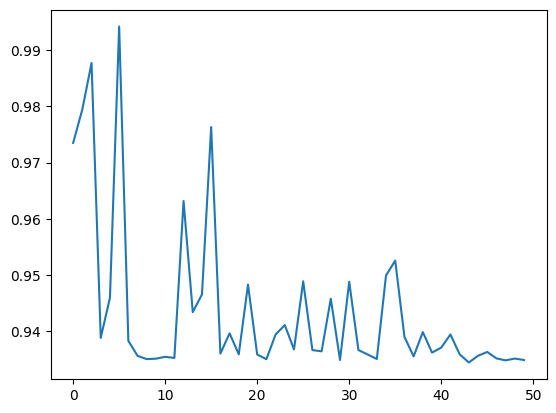

In [22]:
plt.plot(range(n_epochs), cost_history)
plt.show()

---

### **Feature Scaling for Gradient Descent**

Gradient Descent performs best when features are scaled to similar ranges. Use **StandardScaler** for standardization:

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

---

### **Computational Complexity**
1. **Normal Equation**:
   - Complexity: $(O(n^3))$, where $(n)$ is the number of features.
   - Efficient for small feature spaces but impractical for high-dimensional data.

2. **Gradient Descent**:
   - Complexity: $(O(n \cdot m \cdot i))$, where $(i)$ is the number of iterations.
   - Scales better with large datasets.

---

### **Key Takeaways**
1. The Normal Equation provides a closed-form solution for small datasets.
2. Gradient Descent is scalable and suitable for large datasets.
3. Feature scaling is critical for the efficient convergence of Gradient Descent.

---
---

# Linear Regression Optimization Techniques

## 1. The Normal Equation
- **Definition**: A closed-form solution to minimize the cost function in linear regression by directly computing the optimal parameters.
- **Formula**:  
  $
  \theta = (X^T X)^{-1} X^T y
  $
- **Key Points**:
  - Does not require iterations.
  - Computationally expensive for large datasets due to matrix inversion.
  - Suitable for small datasets.

- **Pros**:
  - Exact solution.
  - No need for a learning rate or iterations.

- **Cons**:
  - Computational inefficiency with high-dimensional data.
  - Inverse computation may be unstable if $(X^T X)$ is non-invertible.

## 2. Gradient Descent
- **Definition**: An iterative optimization algorithm that minimizes the cost function by updating parameters in the opposite direction of the gradient.
- **Update Rule**:  
  $
  \theta = \theta - \alpha \cdot \text{gradients}
  $
  where $(\alpha)$ is the learning rate.

- **Key Points**:
  - Scales well with large datasets.
  - Requires tuning of the learning rate and careful selection of stopping criteria.

- **Pros**:
  - Efficient for large datasets.
  - Straightforward implementation.

- **Cons**:
  - Requires tuning of hyperparameters (e.g., learning rate).
  - Can converge to a local minimum for non-convex cost functions.

## 3. Stochastic Gradient Descent (SGD)
- **Definition**: A variation of Gradient Descent where the gradient is computed using a single training example (or a small batch) at each step.
- **Update Rule**:  
  $
  \theta = \theta - \eta \cdot \text{gradients}
  $
  where $(\eta)$ is the learning rate.

- **Key Points**:
  - Introduces randomness by updating parameters using one example at a time.
  - Often faster convergence but noisier updates.

- **Pros**:
  - Faster updates for large datasets.
  - Helps escape local minima due to random sampling.

- **Cons**:
  - Noisy updates can lead to slow convergence.
  - Requires careful tuning of the learning rate.

---

1. **[The Normal Equation - Khan Academy](https://www.khanacademy.org/math/statistics-probability)**  
   Explains linear regression and the Normal Equation in simple terms.

2. **[Stochastic Gradient Descent - Towards Data Science](https://towardsdatascience.com/stochastic-gradient-descent-clearly-explained-53d239905d31)**  
   A detailed explanation of SGD with examples and visuals.

3. **[Gradient Descent - GeeksforGeeks](https://www.geeksforgeeks.org/gradient-descent-in-linear-regression/)**  
   Explains Gradient Descent with examples and Python code.